# Section 2 Quantum algorithms #

## Fourier checking ##

In [1]:
import qiskit.quantum_info as qi
from qiskit.circuit.library import FourierChecking
from qiskit.visualization import plot_histogram

In [2]:
f = [1,-1,1,-1]
g = [-1,-1,-1,-1]

In [3]:
circ = FourierChecking(f=f,g=g)
circ.draw()

┌───────────────────────────────────────┐
q_0: ┤0                                      ├
     │  fc: [1, -1, 1, -1], [-1, -1, -1, -1] │
q_1: ┤1                                      ├
     └───────────────────────────────────────┘

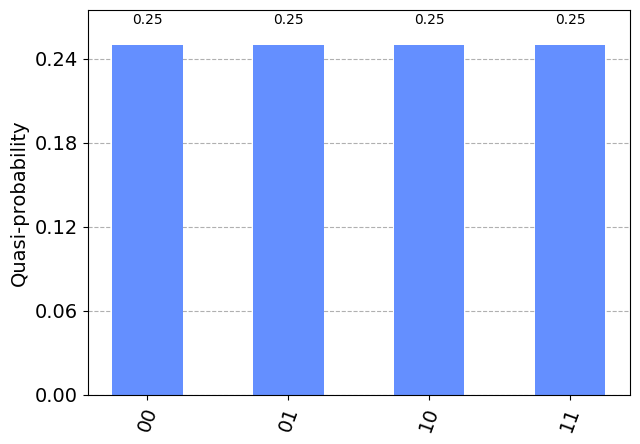

In [4]:
zero = qi.Statevector.from_label('00')
sv = zero.evolve(circ)
probs = sv.probabilities_dict()
plot_histogram(probs)

## Grovers Algorithm ##

In [5]:
my_list = [1,3,5,6,7,3,2,3,1,5,0]

In [6]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#define the oracle circuit
oracle = QuantumCircuit(2,name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [8]:
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [9]:
job = execute(grover_circ,backend)
result = job.result()

In [10]:
sv = result.get_statevector()
np.round(sv,2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [11]:
reflection = QuantumCircuit(2,name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()

Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

In [12]:
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [13]:
backend = Aer.get_backend('qasm_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.append(reflection,[0,1])
grover_circ.measure([0,1],[0,1])

In [14]:
grover_circ.draw()

┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

In [15]:
job = execute(grover_circ,backend,shots=1)

In [16]:
result = job.result()
result.get_counts()

{'11': 1}

## Dinner Party using Grover's Algorithm ##

In [24]:
from qiskit import BasicAer
from qiskit.circuit.library import PhaseOracle
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.tools.visualization import plot_histogram


In [32]:
log_exper = PhaseOracle('((O & A) | (J & M)) & ~(A & M)')
problem = AmplificationProblem(oracle=log_exper, is_good_state=log_exper.evaluate_bitstring)
backend = BasicAer.get_backend('qasm_simulator')
algorithm = Grover(quantum_instance=backend)

C:\Users\32827\AppData\Local\Temp\ipykernel_24352\664151499.py:4: DeprecationWarning: ``qiskit.algorithms.amplitude_amplifiers.grover.Grover.__init__()``'s argument ``quantum_instance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the ``sampler`` argument. See https://qisk.it/algo_migration for a migration guide.
  algorithm = Grover(quantum_instance=backend)


In [39]:
result = algorithm.amplify(problem)

In [48]:
print('Top measurement:', result.circuit_results)

Top measurement: [{'1101': 257, '0011': 252, '1100': 256, '0111': 259}]


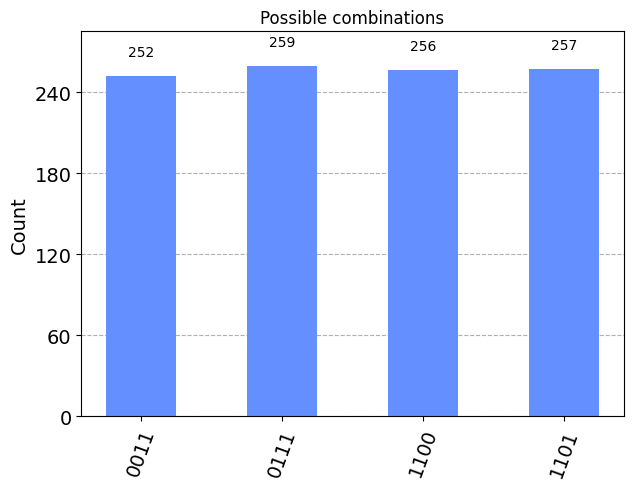

In [49]:
plot_histogram(result.circuit_results,title='Possible combinations', bar_labels=True)

# Shor's Algorithm #

from qiskit.